### Reference: <br>
Data science basics<br>
Doing Data Science<br>
By: Cathy O'Neil; Rachel Schutt<br>
Publisher: O'Reilly Media, Inc.<br>
Pub. Date: October 24, 2013<br>
Print ISBN-13: 978-1-4493-5865-5<br>
Chapter 3 <br>
http://proquest.safaribooksonline.com.proxy.lib.odu.edu/book/databases/9781449363871

http://scikit-learn.org/stable/modules/cross_validation.html

### K-NN

"K-NN is an algorithm that can be used when you have a bunch of objects that have been classified or labeled in some way, and other similar objects that haven’t gotten classified or labeled yet, and you want a way to automatically label them."

The key idea behind K-NN is that if we have a new object to be classified, we look at the distance of the new object, using some metric, to  all the already classified objects. Next sort these distances, and select the "k" closest (say k=5) objects to the new object. We look at how these 5 objects has been classified, and classify the new object based on that (typicall by voting of the 5 nearest neighbor). 

The two questions are: (a) what similarity/distance metric to use, and (b) what is a good value of k. The answer to both depends on the application data. The parameter k is also referred as a hyperparameter which requires tuning. 

We now first outline steps involved in a typical machine learning algorithm without any hyperparameter, and then we discuss a typical machine learning algorithm that requires hyperparameter tuning consists of the following steps.



As such for this algorithm there is no learning involved, all the computation is happening when we are trying to classify a new object. However, most efficent implementation try to preprocess the esisting clasiffied data so that the query for k-nearest neighbor on a new object can be executed efficiently. 


We now first outline steps  in a typical machine learning algorithm without any hyper parameter.
<ul>
<li> Split the data into two sets: training set and test set. This could be 60/40, 80/20, etc.
<li> Train/Fit  the model using training data.
<li>  Evaluate the ML algorithm accuracy  on test data. This is a measure what you can expect the trained algorithm to perform on the new data.
</ul>

A machine learning algorithm with a hyper parameter consists of following steps.
<ul>
<li> Split the data into two sets: training set and test set. This could be 60/40, 80/20, etc.
<li> Use training data to tune the hyper parameter
       <ul>
               <li> Split the training data into a a slightly smaller training set and validation set (80/20). When training data is small we can use cross-validation approach.
               <li> Use the two sets to tune the hyper parameter.  That is, use different values of hyper parameter and evaluate the accuracy on the validation set for the ML algorithm that has been trained using the slightly smaller training set. The value of hyper parameter that results in the best accuracy is selected for further use.
       </ul>
<li> Train/Fit  the model using  the full training data and the value of hyper parameter selected above.

<li>  Evaluate the ML algorithm accuracy on test data. This is a measure of accuracy what you can expect the trained algorithm to perform on the new data.

</ul> 


For applying these steps to K-NN, we first need to decide on the similarity or distance metric. If the variables (features) have the same scale, a simple metric to use is Euclidean distance. In our example, we will use this metric. 


In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


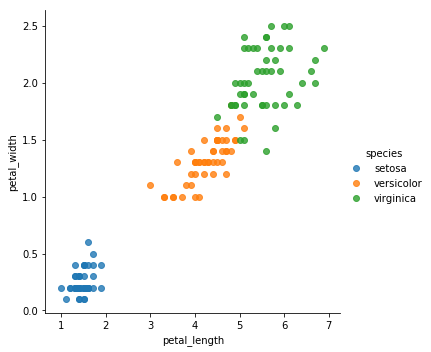

In [3]:
sns.lmplot("petal_length", "petal_width", data=iris, hue="species", fit_reg=False)

IRIS dataset is a good candidate for K-NN approach. We will try this approach using all the four features.

In [4]:
y = np.array(iris.pop('species')) # take species column out as a separate column

In [5]:
y[0:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [16]:
# Use Euclidean distance 
irisa = iris.values
irisa

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
# let us say we want to find Euclidean distance between row 2 and row 4
p1 = irisa[2]
p2 = irisa[4]
print (p1)
print (p2)

[4.7 3.2 1.3 0.2]
[5.  3.6 1.4 0.2]


In [18]:
dist = (p1[0]-p2[0])*(p1[0]-p2[0]) + (p1[1]-p2[1])*(p1[1]-p2[1]) + (p1[2]-p2[2])*(p1[2]-p2[2]) + (p1[3]-p2[3])*(p1[3]-p2[3])
dist = np.sqrt(dist)
print (dist)

0.5099019513592783


In [19]:
dist = np.linalg.norm(p1-p2)
print (dist)

0.5099019513592783


In [20]:
# Split data into training and test
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
irisa, y, test_size=0.2, random_state=42)

In [22]:
print (np.shape(X_train))
print (np.shape(X_test))

(120, 4)
(30, 4)


In [23]:
print (np.shape(y_train))
print (np.shape(y_test))

(120,)
(30,)


In [24]:
# Let us take first sample from the test set and see how we apply K-NN to determine its class
pt = X_test[0]
dist = np.linalg.norm(pt-X_train, axis = 1)
print (np.shape(dist))

(120,)


In [25]:
dist[0:10]

array([4.19285106, 3.68781778, 0.76157731, 3.55808937, 3.95094925,
       0.84261498, 0.6164414 , 3.54118624, 3.7067506 , 3.73496988])

In [26]:
# use numpy argpartition to find k smallest elements in dist

In [27]:
k = 4
x = np.array([31, 40, 20, 11, 12, 15, 33, 43])
ind = np.argpartition(x, k-1)[:k]
x[ind]

array([11, 12, 15, 20])

In [28]:
np.argpartition?

In [29]:
k = 5
minkind = np.argpartition(dist, k-1)[:k]
print (minkind)

[90 79 39 73 80]


In [ ]:
print (dist[minkind])
np.min(dist)

In [30]:
nn5 = y_train[minkind]
print(nn5)

['versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor']


In [38]:
from collections import Counter
ctnn5=Counter(nn5)


In [22]:
pred

'versicolor'

In [35]:
y_test[0] # prediction matches the test label

'versicolor'

Exercise: Repeat the above computation for predicting first test sample label for  IRIS data set with only two features petal_length and petal_width instead of using all the four features. Does the label for the first test sample matches with the true value?

In [7]:
irisb= iris.values[:, [2, 3]]
irisb

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
irisb, y, test_size=0.2, random_state=42)
print (np.shape(X_train))
print (np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))



(120, 2)
(30, 2)
(120,)
(30,)


In [10]:
pt = X_test[0]
dist = np.linalg.norm(pt-X_train, axis = 1)
print (np.shape(dist))

(120,)


In [11]:
dist[0:10]

array([3.83275358, 3.2984845 , 0.36055513, 3.25729949, 3.54400903,
       0.76157731, 0.36055513, 3.35261092, 3.44818793, 3.38378486])

In [12]:
k = 4
x = np.array([31, 40, 20, 11, 12, 15, 33, 43])
ind = np.argpartition(x, k-1)[:k]
x[ind]

array([11, 12, 15, 20])

In [13]:
k = 5
minkind = np.argpartition(dist, k-1)[:k]
print (minkind)

[92 82 79 90 93]


In [14]:
print (dist[minkind])
np.min(dist)

[0.14142136 0.2        0.2        0.2236068  0.3       ]


0.14142135623730995

In [15]:
nn5 = y_train[minkind]
print(nn5)

['versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor']


In [18]:
from collections import Counter
ctnn5=Counter(nn5)

In [20]:
y_test[0]

'versicolor'

Let us do this in the loop for all the test data and compute the accuracy with k = 5

In [36]:
m = len(y_test)
pred = np.empty(m, dtype=object)
np.shape(pred)

(30,)

In [39]:
for i in range(m):
    pt = X_test[i]
    dist = np.linalg.norm(pt-X_train, axis = 1)
    minkind = np.argpartition(dist, k-1)[:k]
    nn5 = y_train[minkind]
    ctnn5 = Counter(nn5)
    pred[i] = ctnn5.most_common(1)[0][0]  
    

In [40]:
pred


array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [ ]:
y_test

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

1.0

Exercise: Calculate the accuracy score for IRIS data set with only two features petal_length and petal_width.

In [21]:
irisb

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [22]:
m = len(y_test)
pred = np.empty(m, dtype=object)
np.shape(pred)

(30,)

In [23]:
for i in range(m):
    pt = X_test[i]
    dist = np.linalg.norm(pt-X_train, axis = 1)
    minkind = np.argpartition(dist, k-1)[:k]
    nn5 = y_train[minkind]
    ctnn5 = Counter(nn5)
    pred[i] = ctnn5.most_common(1)[0][0]

In [24]:
pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [25]:
y_test

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

1.0

We had picked value of k arbitrarily. How to tune it? Take the training data and split it further.

In [44]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
X_train, y_train, test_size=0.1, random_state=0)

In [45]:
print (np.shape(X_train1))
print (np.shape(X_test1))
print (np.shape(y_train1))
print (np.shape(y_test1))


(108, 4)
(12, 4)
(108,)
(12,)


In [46]:
m = len(y_test1)
pred = np.empty(m, dtype=object)
k = 7 # you can easilty setup a loop for differnt k values
for i in range(m):
    pt = X_test1[i]
    dist = np.linalg.norm(pt-X_train1, axis = 1)
    minkind = np.argpartition(dist, k-1)[:k]
    nn5 = y_train1[minkind]
    ctnn5 = Counter(nn5)
    #print (ctnn5)
    pred[i] = ctnn5.most_common(1)[0][0] 
accuracy_score(y_test1, pred) 

1.0

### Using K-NN from Scikit Package

In [47]:
# let us take 1/3 for testing this time 
X_train, X_test, y_train, y_test = train_test_split(
irisa, y, test_size=0.33, random_state=42)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [49]:
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
accuracy = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print (accuracy.mean())

0.9525252525252526


In [50]:
accuracy_array = []
k_array = []
for k in range(3,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    accuracy_array.append(accuracy.mean())
    k_array.append(k)
print (accuracy_array)
print(k_array)

[0.9432828282828283, 0.9516161616161616, 0.9525252525252526, 0.9441919191919192, 0.9425252525252527, 0.9341919191919192, 0.9425252525252527, 0.9425252525252527, 0.9425252525252527, 0.9425252525252527, 0.9314141414141416, 0.9505050505050505, 0.9121212121212121, 0.9091919191919192, 0.891010101010101, 0.9001010101010103, 0.9091919191919192, 0.9001010101010103, 0.8917676767676769, 0.902878787878788, 0.8917676767676769, 0.8826767676767677, 0.8826767676767678, 0.8715656565656567]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


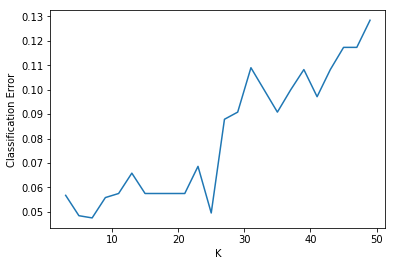

In [51]:
class_error = 1.0 - np.array(accuracy_array)
plt.plot(k_array, class_error)
plt.xlabel('K')
plt.ylabel('Classification Error')
plt.show()

In [52]:
min_ind = np.argmin(class_error)
OptK = k_array[min_ind]
print ("Optimal value of K is %d " %  OptK)

Optimal value of K is 7 


In [53]:
# Use Optimal value of K for test set
knn = KNeighborsClassifier(n_neighbors=OptK)

# fitting the model
knn.fit(X_train, y_train)

# predict
pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, pred))

0.98


Exercise: Load the following data set as shown below. Each row in X is a 64-dimensional data. Use K-NN from Scikit package to evaluate its effectiveness for this dataset. For this you need to partition the data into training and test set. Also, use the cross_val_score to tune the hyper parameter k.  Using the tuned k apply K-NN and evaluate the accuracy_score.

In [68]:
# Load the  dataset
digits = datasets.load_digits()
X3D = digits.images # loaded as 3d array (each row is a 8 x 8 image)
n_samples = len(X3D)
X = X3D.reshape((n_samples, -1)) # flatten the array
print(X)
y = digits.target  

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [69]:
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [71]:
accuracy_array = []
k_array = []
for k in range(3,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, X_trainN, y_trainN, cv=10, scoring='accuracy')
    accuracy_array.append(accuracy.mean())
    k_array.append(k)
print (accuracy_array)
print(k_array)

[0.9825960489928949, 0.9783906380397027, 0.9791612932079863, 0.9759151747958471, 0.9717572044807248, 0.9693250232702504, 0.9659139373418693, 0.962700929211788, 0.9611009292117879, 0.9586208243942108, 0.957827598544055, 0.9544411685962281, 0.9536277304453178, 0.9527541767263094, 0.9469442429207872, 0.9461442429207872, 0.9420583341438021, 0.942149904716105, 0.9437363536626974, 0.9429409513638468, 0.939544025688406, 0.935319278557839, 0.9337329397600248, 0.934539713909869]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


[0.01740395 0.02160936 0.02083871 0.02408483 0.0282428  0.03067498
 0.03408606 0.03729907 0.03889907 0.04137918 0.0421724  0.04555883
 0.04637227 0.04724582 0.05305576 0.05385576 0.05794167 0.0578501
 0.05626365 0.05705905 0.06045597 0.06468072 0.06626706 0.06546029]


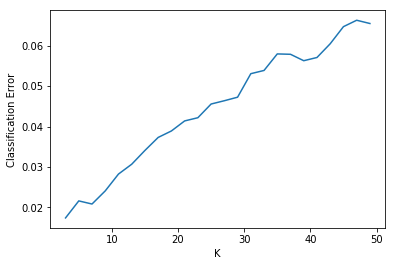

In [72]:
class_error = 1.0 - np.array(accuracy_array)
print(class_error)
plt.plot(k_array, class_error)
plt.xlabel('K')
plt.ylabel('Classification Error')
plt.show()

In [76]:
min_ind = np.argmin(class_error)
print(min_ind)
OptK = k_array[min_ind]
print ("Optimal value of K is %d " %  OptK)

0
Optimal value of K is 3 


In [75]:
knn = KNeighborsClassifier(n_neighbors=OptK)

# fitting the model
knn.fit(X_train, y_train)

# predict
pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, pred))

0.98989898989899
